# Feature Distribution
This notebook explores the distribution of audio features from a sample of music data from the Free Music Archive (fma) which is cleaned from "filtered.csv".

## Exploring the Dataframe

In [ ]:
%matplotlib inline

import os
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import ast


In [ ]:
df = pd.read_csv('filtered.csv', index_col='track_id')
df.head()

track_title album_date_released  ... track_tempo  track_valence
track_id                                    ...                           
1                 Food       1/5/2009 0:00  ...     165.922       0.576661
2         Electric Ave       1/5/2009 0:00  ...     126.957       0.269240
3           This World       1/5/2009 0:00  ...     100.260       0.621661
4              Freeway       2/6/2008 0:00  ...     111.562       0.963590
5         Street Music       1/5/2009 0:00  ...     114.290       0.894072

[5 rows x 17 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13105 entries, 1 to 13124
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_title             13022 non-null  object 
 1   album_date_released     9291 non-null   object 
 2   album_listens           13102 non-null  object 
 3   album_favorites         13105 non-null  int64  
 4   artist_favorites        13099 non-null  float64
 5   track_genretop          13105 non-null  object 
 6   track_favorites         13028 non-null  object 
 7   track_listens           13027 non-null  object 
 8   track_interest          13025 non-null  object 
 9   track_acousticness      13105 non-null  float64
 10  track_danceability      13105 non-null  float64
 11  track_energy            13105 non-null  float64
 12  track_instrumentalness  13105 non-null  float64
 13  track_liveness          13105 non-null  float64
 14  track_speechiness       13105 non-null

In [ ]:
df.head()

track_title album_date_released  ... track_tempo  track_valence
track_id                                    ...                           
1                 Food       1/5/2009 0:00  ...     165.922       0.576661
2         Electric Ave       1/5/2009 0:00  ...     126.957       0.269240
3           This World       1/5/2009 0:00  ...     100.260       0.621661
4              Freeway       2/6/2008 0:00  ...     111.562       0.963590
5         Street Music       1/5/2009 0:00  ...     114.290       0.894072

[5 rows x 17 columns]

In [ ]:
### Normalize Tempo column
from sklearn.preprocessing import Normalizer, MinMaxScaler

df['track_tempo'] = MinMaxScaler().fit_transform(df['track_tempo'].values.reshape(-1,1))
df['track_tempo'].head()

track_id
1    0.642706
2    0.479206
3    0.367184
4    0.414608
5    0.426055
Name: track_tempo, dtype: float64

In [ ]:
### Isolate audio features into one dataframe
audio_cols = ['track_acousticness', 'track_danceability', 'track_energy', 'track_instrumentalness', 'track_liveness', 'track_speechiness', 'track_tempo', 'track_valence']
audio_features = df[audio_cols]

### Definition of Features from Spotify's site
Taken from Spotify's site: https://developer.spotify.com/web-api/get-audio-features/

- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **Energy** is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. The value here is normalized so the max value = 1
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

### Distribution of Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1dff89510>,
      dtype=object)

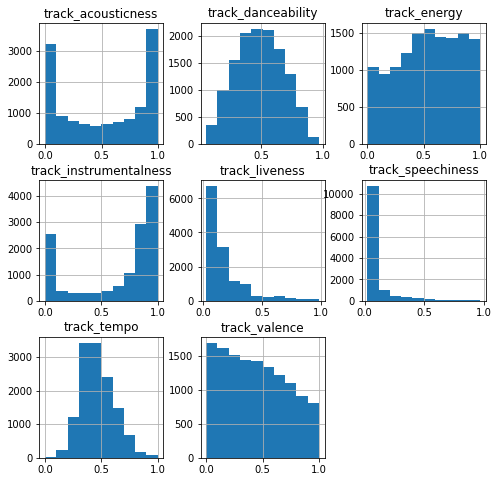

In [ ]:
audio_features.hist(figsize=(8,8))


Above we see that each audio feature is distributed differently. Danceability and Tempo appear somewhat normally distributed. Speechiness and Liveness Pareto distribution. Acousticness and Instrumentalness have tails on the extreme ends. Energy and Valence are roughly evenly distributed. 

## Correlation Between Audio Features
Below, we look at a heat map concerning the cross-correlations among each audio features to see the extent to which each audio feature is correlated with one another.

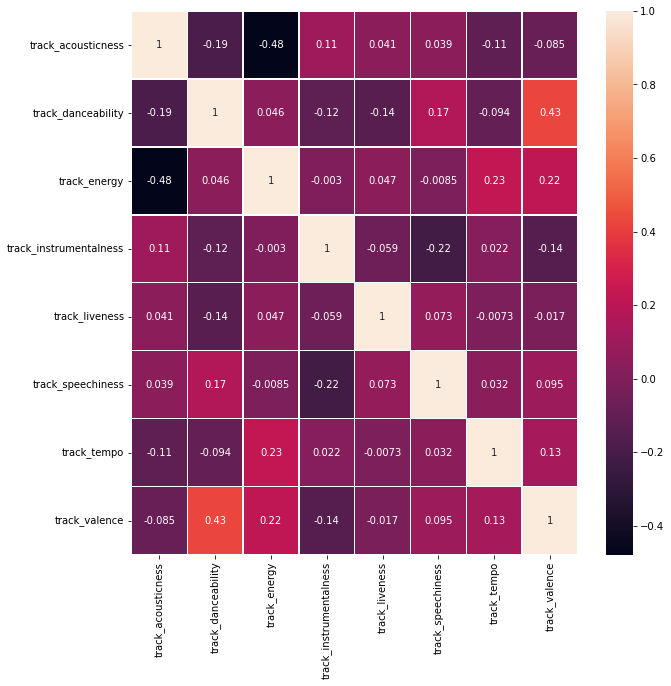

In [ ]:
plt.figure(figsize=(10,10))
corr = audio_features.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot=True,
           linewidth=0.5)
plt.savefig('audio_heatmap.png')

In [ ]:
abs(corr) > 0.3

track_acousticness  ...  track_valence
track_acousticness                    True  ...          False
track_danceability                   False  ...           True
track_energy                          True  ...          False
track_instrumentalness               False  ...          False
track_liveness                       False  ...          False
track_speechiness                    False  ...          False
track_tempo                          False  ...          False
track_valence                        False  ...           True

[8 rows x 8 columns]

### Comment
The heatmap shows some noteworthy (|correlation| > 0.3) relationships:
- Acousticness vs. Energy (-0.48). The higher the acousticness, the lower the energy.
- Danceability vs. Valence (0.43). The more danceable a track is, the higher valence/happier it tends to be.


### Calculating P-Values
Assume that we have a null-hypothesis that states that each audio feature is independent. The alternative hypothesis is that for each audio feature, another audio feature is correlated in some way.

The result above shows significant relationships betweena Acousticness vs. Energy and Danceability vs. Valence, so the p-values of note will be for those values.

In [ ]:
from scipy.stats import pearsonr
import pandas as pd
# Function taken from: https://stackoverflow.com/questions/25571882/pandas-columns-correlation-with-statistical-significance
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

calculate_pvalues(audio_features)

track_acousticness  ... track_valence
track_acousticness                      0  ...             0
track_danceability                      0  ...             0
track_energy                            0  ...             0
track_instrumentalness                  0  ...             0
track_liveness                          0  ...        0.0505
track_speechiness                       0  ...             0
track_tempo                             0  ...             0
track_valence                           0  ...             0

[8 rows x 8 columns]

Looking at the p-values for Acousticness vs. Energy and Danceability vs. Valence, we see a p-value that doesn't register above > 0.05, so we can reject the null hypothesis for those two relationships. 


### Plotting Distribution of Audio Features By Genre (All)
Below are some scatter plots that lay out the all the songs and see if there are any distinct groupings when grouped by genres and plotted across select features. The plots below show some interesting distributions by genre that match everyday musical intuition. 

In [ ]:
df.sort_values('track_genretop', inplace=True)

In [ ]:
n_genres = len(df['track_genretop'].unique())

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Energy vs. Acousticness')

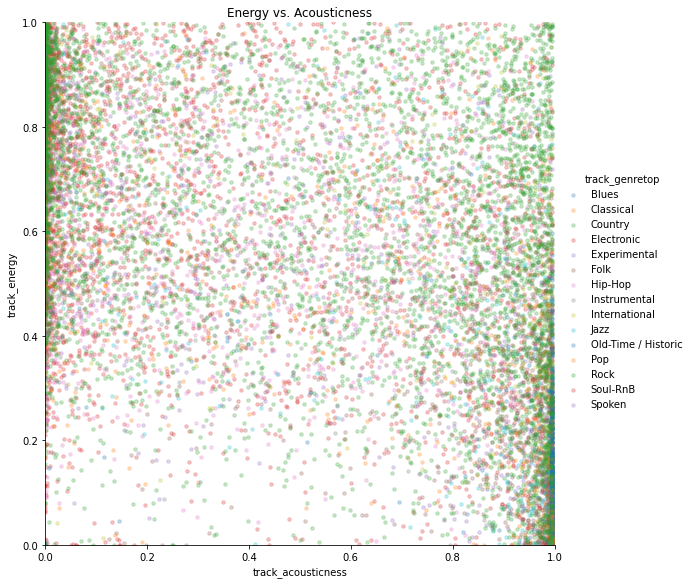

In [ ]:
sns.lmplot(data=df, x="track_acousticness", y="track_energy", hue="track_genretop", palette='tab10',
           fit_reg=False, legend=True, size=8, scatter_kws={'alpha':0.25, 's':12})
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.title("Energy vs. Acousticness")
#sns.set_palette('Set3', n_colors=n_genres)

The upper left corner (high energy, low acousticness) is crowded by Electronic.  The lower left corner (high acousticness, low energy) is a hotspot for folk & old-time music. 

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Instrumentalness vs. Acousticness')

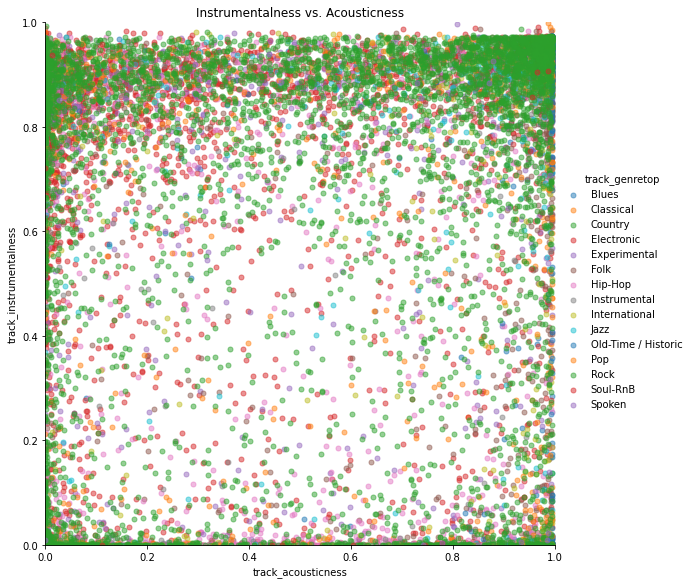

In [ ]:
sns.lmplot(data=df, x="track_acousticness", y="track_instrumentalness", hue="track_genretop", palette="tab10",
           fit_reg=False, legend=True, size=8, 
           scatter_kws={'alpha':0.5, 's':25})
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.title("Instrumentalness vs. Acousticness")

The upper left (High instrumentalness, low acousticness) is dominated by Electronic music, while the upper right (high instrumentalness and acousticness) is dominated by Rock. Clusters of folk can also be found in this region. 

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


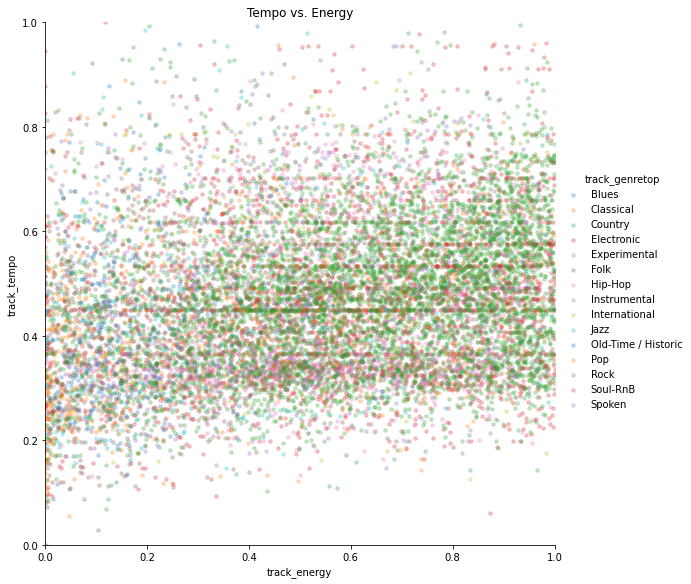

In [ ]:
sns.lmplot(data=df, x="track_energy", y="track_tempo", hue="track_genretop", palette="tab10",
           fit_reg=False, legend=True, size=8,
          scatter_kws={'alpha':0.25, 's':12})
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.title("Tempo vs. Energy")
plt.savefig('tempo_v_energy.png')

Among these set of plots, this one shows some of the clearer distinctions between genre clusters. The left region (low energy, mid-tempo) consists mostly of folk and old-time historic. As energy increases to the right, more rock and electronic songs show up. 

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Danceability vs. Valence')

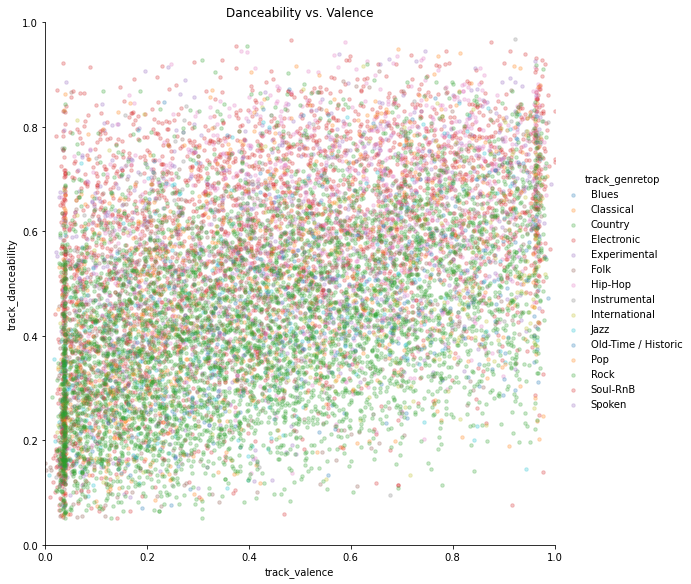

In [ ]:
sns.lmplot(data=df, x="track_valence", y="track_danceability", hue="track_genretop", palette="tab10",
           fit_reg=False, legend=True, size=8,
          scatter_kws={'alpha':0.25, 's':12})
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.title("Danceability vs. Valence")

Genres seem to have valences across all values, but the dividing line seems to cross at danceability ~ 0.5. On top, Electronic dominates, while the bottom is dominated by Rock, inidcating that across all happiness levels, Electronic is more danceable that Rock. There's also a subtle increasing trend; as valence increases, danceability increases. 

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Valence vs. Energy')

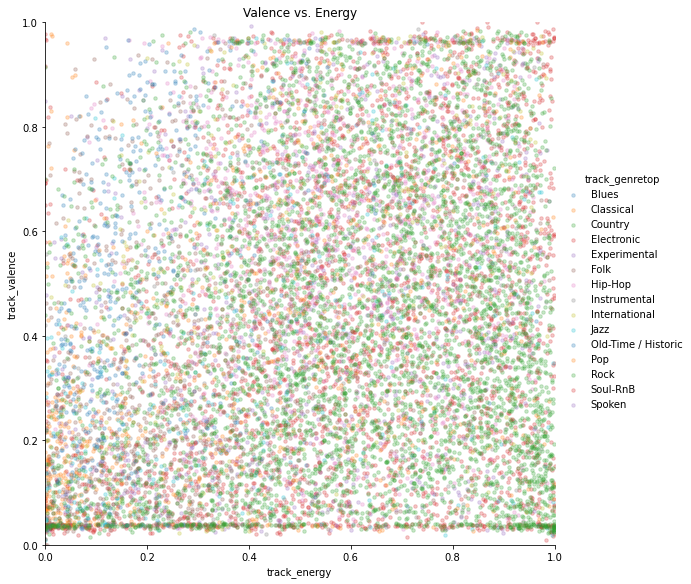

In [ ]:
sns.lmplot(data=df, x="track_energy", y="track_valence", hue="track_genretop", palette="tab10",
           fit_reg=False, legend=True, size=8, 
          scatter_kws={'alpha':0.25, 's':12})
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.title("Valence vs. Energy")

Folk, Instrumentals, and Pop seem to have low energy but are happier, while Rock and Electronic songs tend to be more energetic and distributed along many valence/happiness levels. 

#### Plotting each track is messy!
The scatter plots suggest some relationships between features and genres but are still hard to decipher. We need to sample a few genres at a time.

### Box-Plots of Audio Features By Genre

In [ ]:
### Create a sample of 300 songs from each top genre
k = 6
sample_size = 300
top_k_genres = df.track_genretop.value_counts().index.values[:k]
top_k_genres = sorted(top_k_genres)
df_sample = pd.DataFrame()
for genre in top_k_genres:
    df_sample = pd.concat([df.loc[df.track_genretop==genre].sample(sample_size, random_state=2021), df_sample])
df_sample.track_genretop.value_counts()

Folk            300
Rock            300
Hip-Hop         300
Electronic      300
Pop             300
Experimental    300
Name: track_genretop, dtype: int64

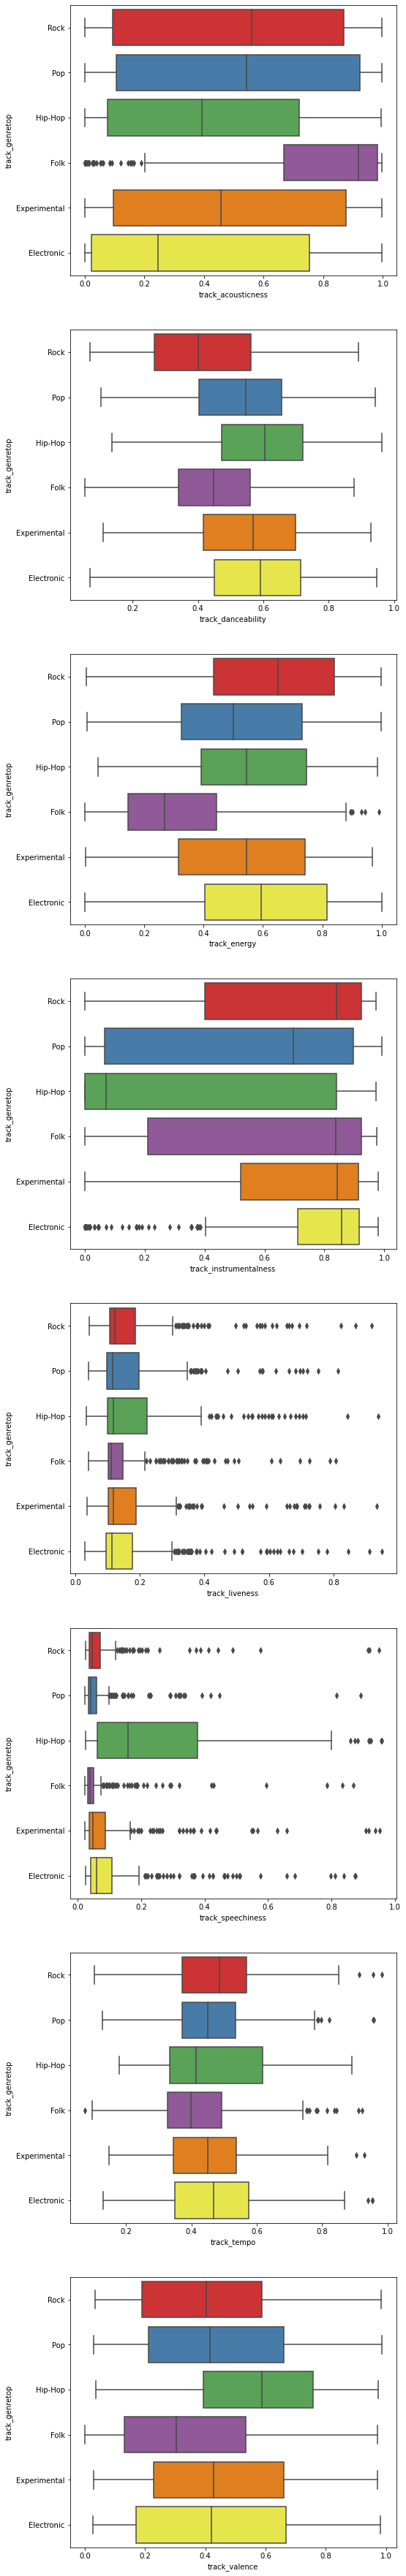

In [ ]:
audio_cols = ['track_acousticness', 'track_danceability', 'track_energy', 'track_instrumentalness', 'track_liveness', 'track_speechiness', 'track_tempo', 'track_valence']
n_features = len(audio_cols)

fig, axes = plt.subplots(n_features, 1, figsize=(8,8*n_features))

for i in range(n_features):
    ax = axes[i]
    feature = audio_cols[i]
    sns.boxplot(x=feature, y='track_genretop', data=df_sample, ax=ax, palette='Set1')


#### Remarks
- **Acousticness**:
    - Electronic typically scores low . 
    - Folk's distribution is centered towards high acousticness scores (not surprising) but has plenty of outliers that score low.
    - Rock's distribution spans through a large chunk of the available range.

- **Danceability**:
    - For the most part, each genre centers around medium values for danceability.

- **Energy**:
    - Folk's distribution contrasts how it score in acousticness, visibly clustering at lower values than other genres.

- **Instrumentalness**:
    - The distribution for Rock and Experimental are quite similar, 
    - Pop, Folk, Experimental, and Rock all have lower quartiles that extend far past the mean relative to the upper quartile. One way to interpret this is that songs in these genres typically have strong instrumental sounds, but there's a significant minority of songs within these genres where instrumentals are much less prominent. 
    -Electronic has many outliers which have relatively low instrumentalness.

- **Liveness**:
    - Plenty of outliers all around. This is a weird audio feature that is track-specific, signifying if the track sounds like it's live or not. There isn't much insight on a per-genre basis because this is dependent on the sample of tracks that happen to be live given a genre.

- **Speechiness**:
    - To nobody's surprise, A genre that is mostly centered around vocals (Hip-Hop) vastly outscore all genres in speechiness.
    - Other genres typically score low but have plenty of outliers outside of its upper quartiles.

- **Tempo**:
    - Each genre seems to share roughly the same distribution here, with some outliers with high tempos. 

- **Valence**:
    - Hip-Hop takes the honor for happiest genre of this sample. 
    - Fork on the other hand is the saddest / angriest genre of the sample. 

### Plotting Audio Feature Distribution By Genre (Sample)

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


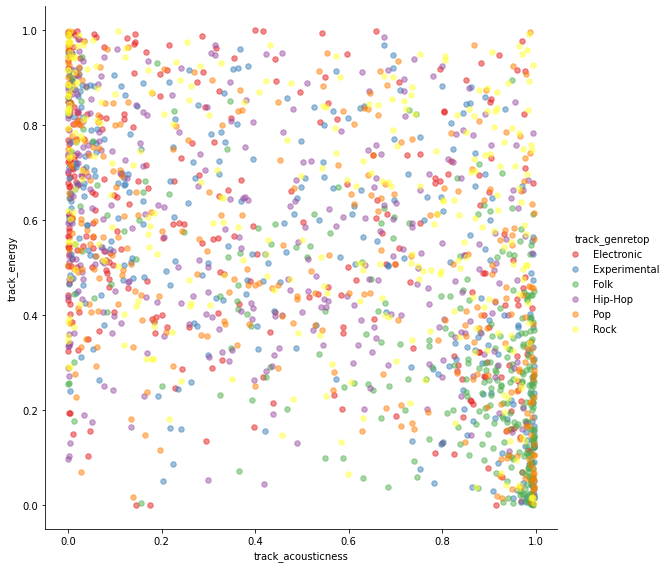

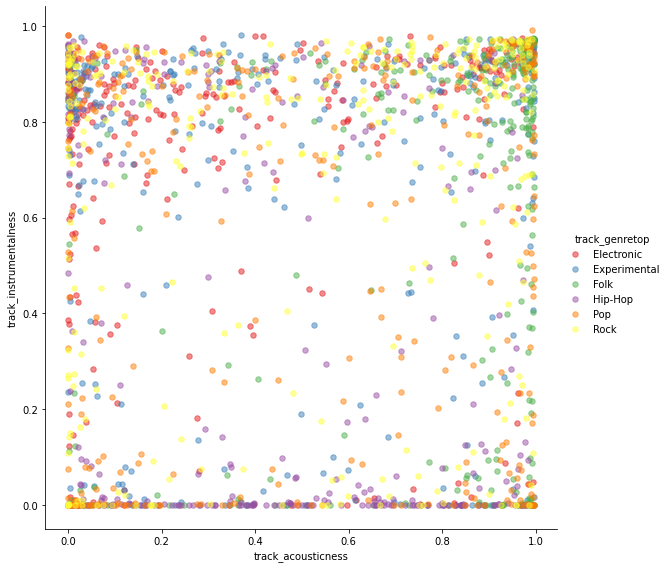

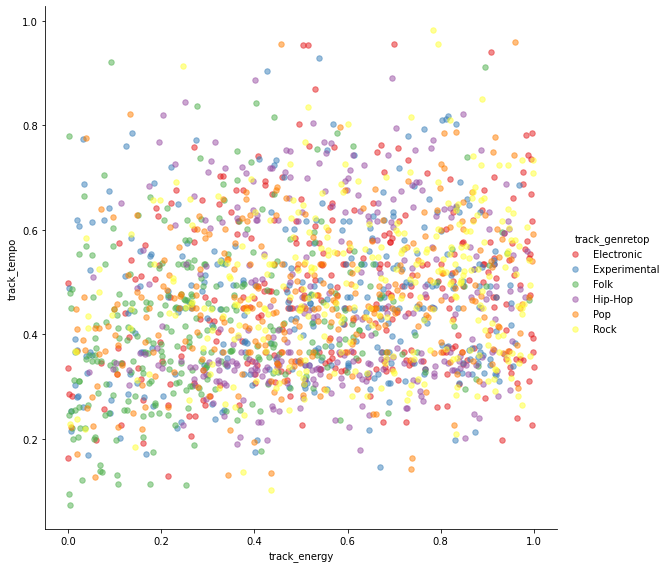

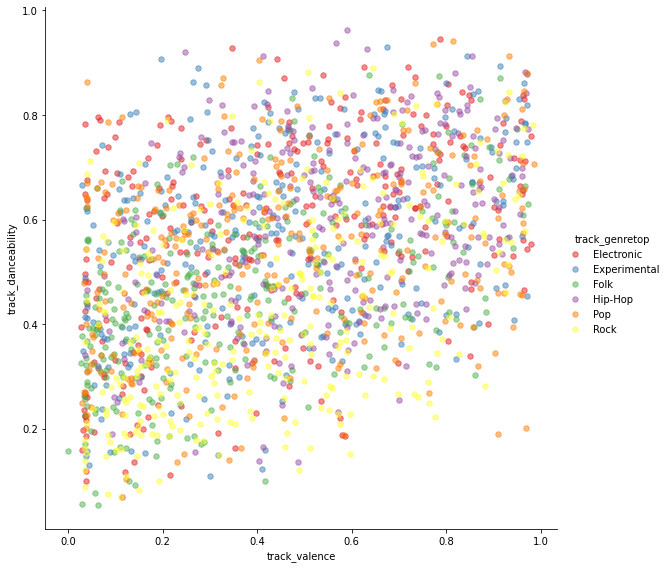

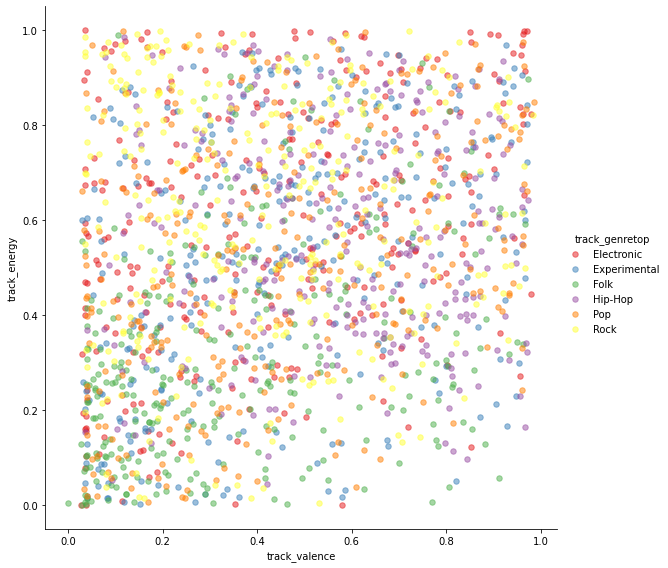

In [ ]:
import itertools

### For all audio combos
# audio_cols = ['track_acousticness', 'track_danceability', 'track_energy', 'track_instrumentalness', 'track_liveness', 'track_speechiness', 'track_tempo', 'track_valence']
# audio_cols.remove('track_liveness')
# audio_combos = list(itertools.combinations(audio_cols, 2))

### Select few audio combos
audio_combos = [('track_acousticness', 'track_energy'), 
                ('track_acousticness', 'track_instrumentalness'), 
                ('track_energy', 'track_tempo'), 
                ('track_valence', 'track_danceability'),
              ('track_valence', 'track_energy'),
               ]

df_sample.sort_values('track_genretop', inplace=True)
for x, y in audio_combos:
    sns.lmplot(data=df_sample, x=x, y=y, hue="track_genretop", palette='Set1',
           fit_reg=False, legend=True, size=8, scatter_kws={'alpha':0.5, 's':30})

The relationships between genres and features are quite messy as before, even when controlling sample sizes such that each genre has the same amount. Boxplots are a much better way to show feature distribution for this dataset.

### Plotting Audio Feature Relationship By Genre
The next part is to visualize how two audio features relate to each other when separated by genre. For example, we generally expect that acousticness decreases as energy increases as shown above.


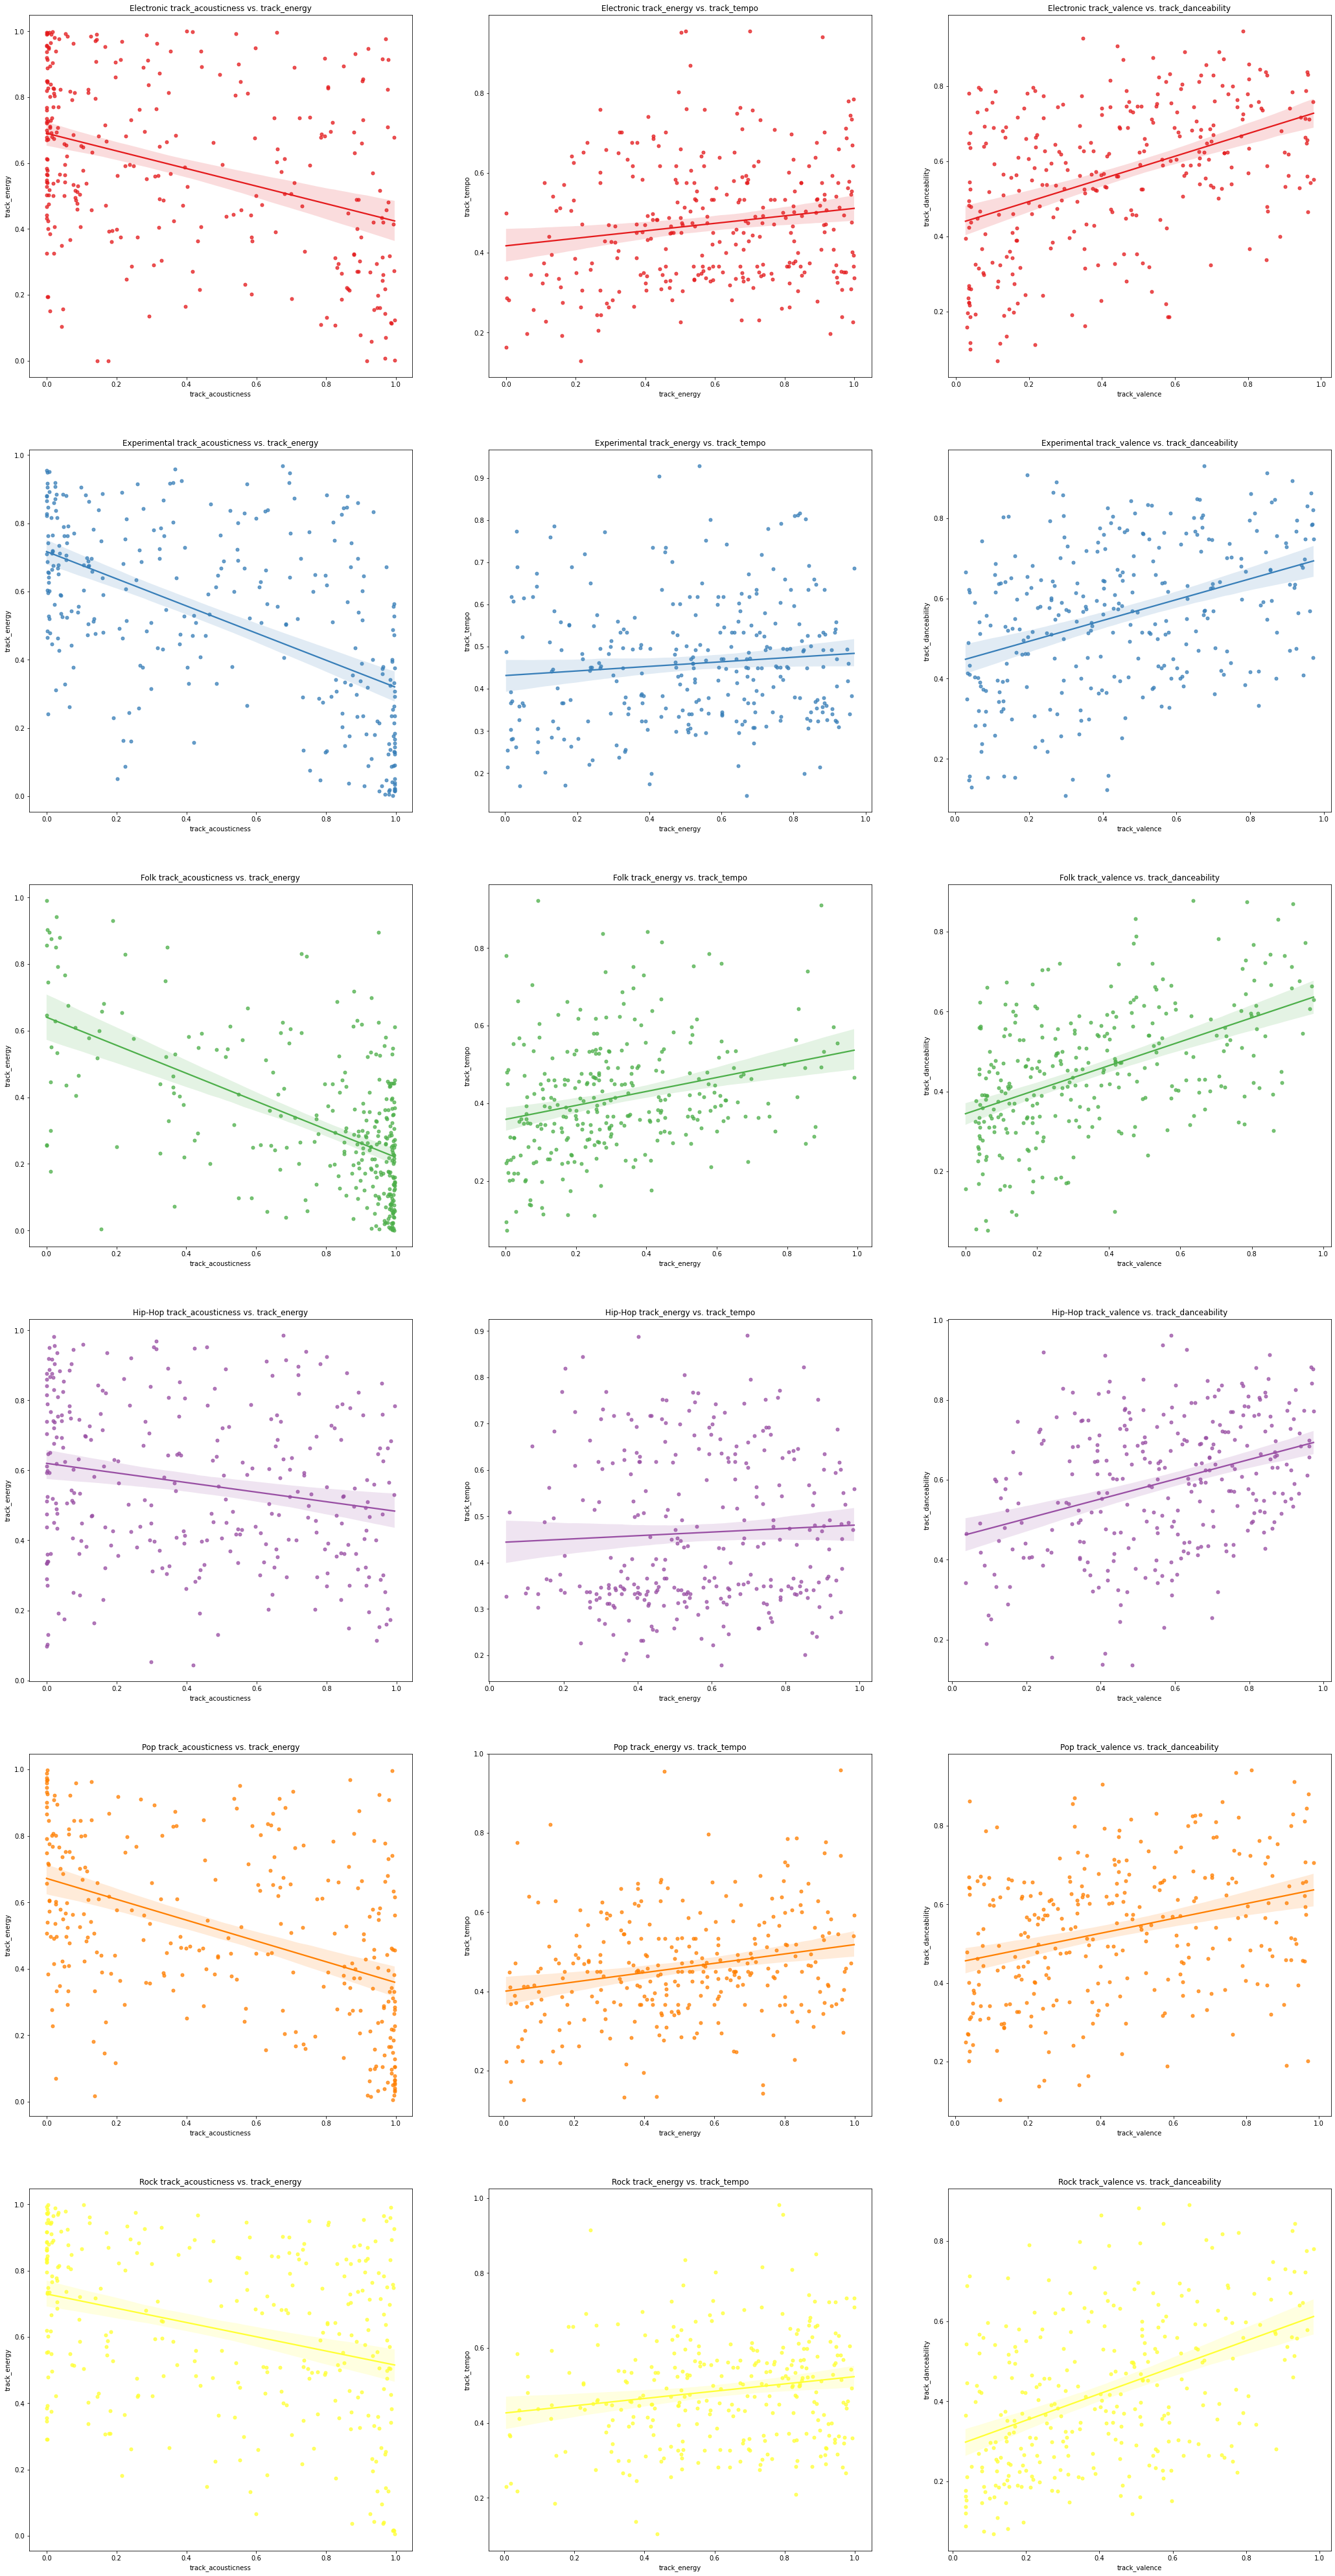

In [ ]:

n_audio_combos = len(audio_combos)
k = len(top_k_genres)
fig, axes = plt.subplots(k, n_audio_combos)
fig.set_figheight(12*k)
fig.set_figwidth(12*n_audio_combos)
audio_combos = [('track_acousticness', 'track_energy'), 
                ('track_energy', 'track_tempo'), 
                ('track_valence', 'track_danceability'),
               ]
colors = sns.color_palette('Set1')[:k]

for i in range(n_audio_combos):
    x,y = audio_combos[i]
    
    for j in range(k):
        genre = top_k_genres[j]
        ax = axes[j,i]
        sns.regplot(data=df_sample[df_sample.track_genretop==genre], x=x, y=y, color=colors[j],
                                  fit_reg=True, scatter_kws={'alpha':0.75, 's':25},
                   ax=ax)
        ax.set_title('{} {} vs. {}'.format(genre,x,y))

#### Remarks
- **Acousticness vs. Energy**: Hip-Hop is roughly flat, indicating that neither feature relate that much to one another. Electronic, Folk, Experimental,Rock and Pop show a downward trend, indicating that energy goes down with acousticness
- **Tempo vs. Energy**: Fit lines were flat across the board. This is a bit surprising to us because we expect that energy increases as partially as a result of tempo increasing. The faster the song, the more 'energetic' it should sound. 
- **Valence vs. Danceability**: Positive correlation across the board; the happier a song is, the more 'danceable' it is. 